## Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn import datasets, svm, preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Data loading

In [3]:
df = pd.read_csv(os.getcwd()+"/pre_processing/dataset_traite.csv", sep=',', parse_dates=["DateTime"],index_col=['DateTime'])

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


## Data viz

In [8]:
active_power_df = df[['Global_active_power']]
active_power_df = active_power_df.loc[active_power_df.index.year == 2007]
active_power_df

,Global_active_power
DateTime,
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554
...,...
2007-12-31 23:55:00,1.746
2007-12-31 23:56:00,1.732
2007-12-31 23:57:00,1.732


#### Average global active power (in kilowatt) per week in 2007

<AxesSubplot:title={'center':'Average global active power (in watt) per week in 2007'}, xlabel='DateTime'>

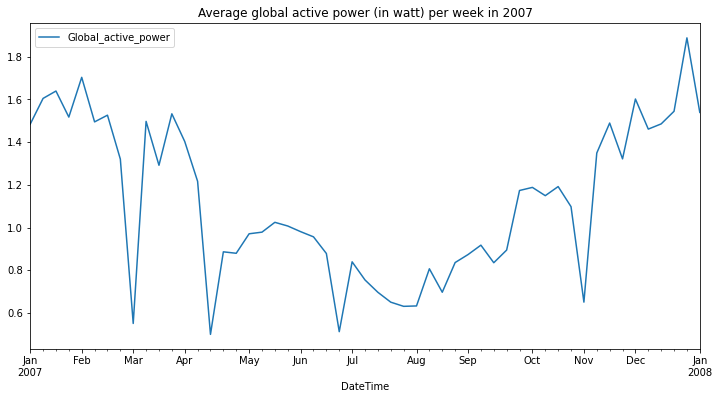

In [9]:
weekly_avg = active_power_df.resample("W").mean()
weekly_avg.plot(figsize=(12,6), title="Average global active power (in watt) per week in 2007")

#### Moving average of the daily average global active power (in watt) in 2007

<AxesSubplot:xlabel='DateTime'>

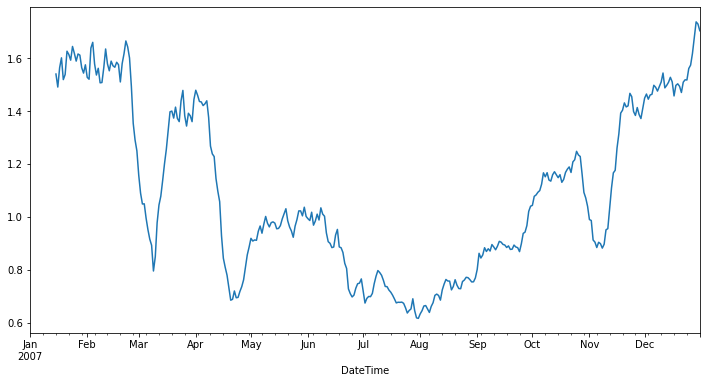

In [10]:
daily_avg = active_power_df.resample("D").mean()

sma_length = 15
sma = daily_avg["Global_active_power"].rolling(window=sma_length).mean()
sma.plot(figsize=(12,6))
# sma

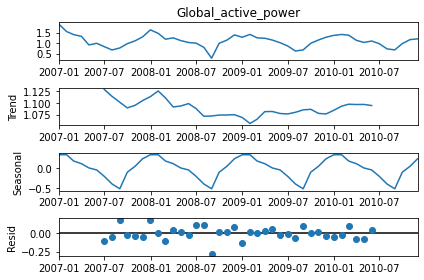

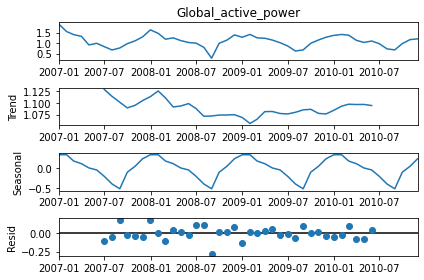

In [11]:
data2 = df.copy()
data2 = data2.resample('M').mean()
data2.fillna(data2.mean(), inplace=True)
results = seasonal_decompose(data2["Global_active_power"])
results.plot()

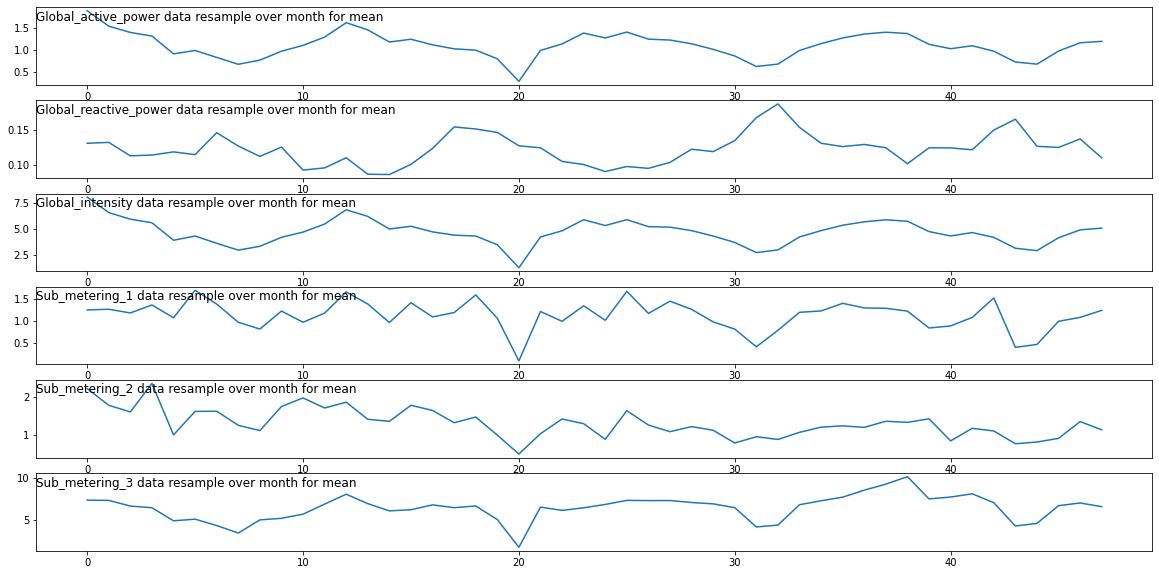

In [12]:
data = df.copy()
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('m').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

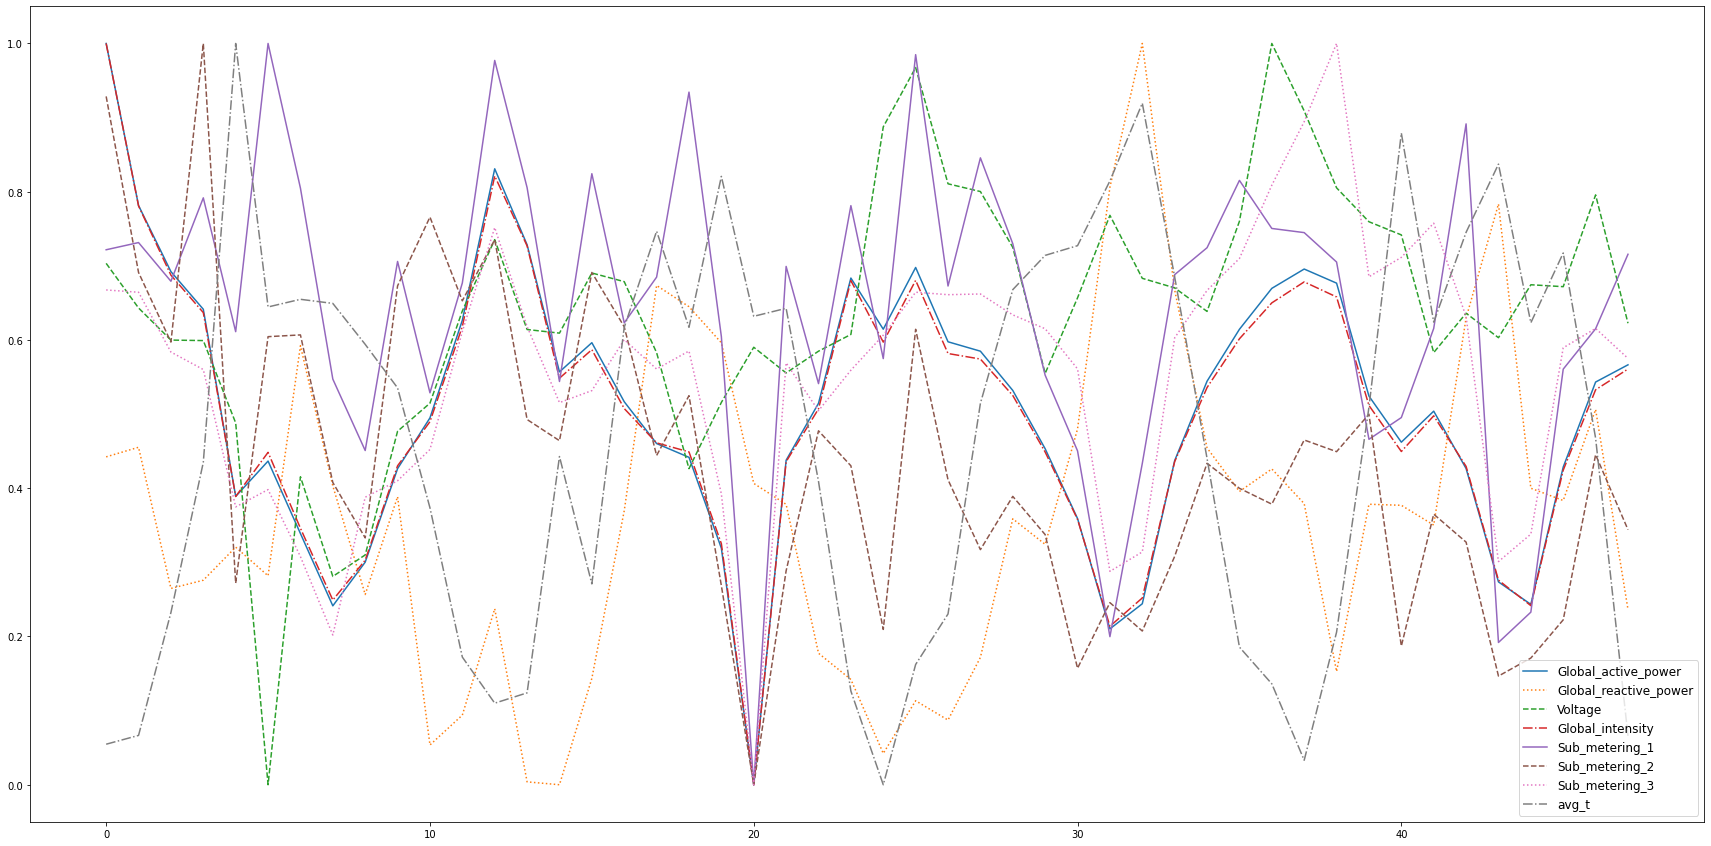

In [95]:
#plot global et sub sur meme plot, remettre a echelle

linestyle_str = ['solid','dotted','dashed','-.','-','--',':','dashdot']

data = df.copy()
data['Date'] = pd.to_datetime(data.index.date)
temperatures = pd.read_csv("pre_processing/temperatures.csv", parse_dates=['Date'], index_col='Date')
temperatures['avg_t'] = (temperatures['max_t'] - temperatures['min_t'])/2
data = data.join(temperatures, how="left", on='Date')
data = data.drop(columns=['Date','max_t','min_t'])
data = data.resample('m').mean()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)
data[data.columns] = scaler.transform(data[data.columns])
plt.figure(figsize=(30, 15))
cols=[0, 1, 2, 3, 4, 5, 6, 7]
for col in cols:
    plt.plot(data.values[:, col],linestyle=linestyle_str[col])
plt.legend(data.columns,loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
plt.show()

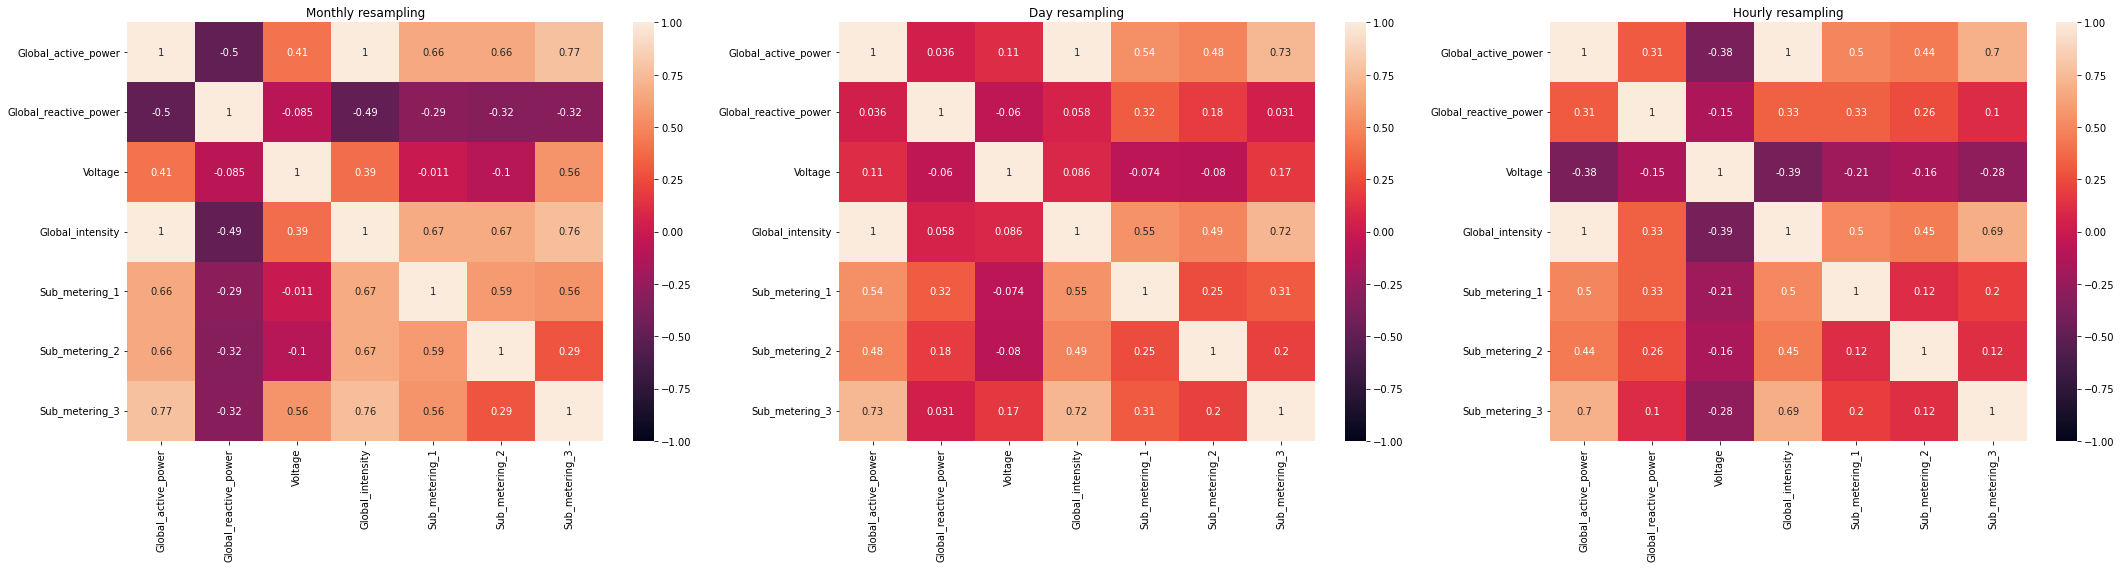

In [36]:
import seaborn as sns
fig,axs= plt.subplots(1,3,figsize=(30, 8))

dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True, ax = axs[0])
axs[0].set_title('Monthly resampling', size=12)

dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True, ax = axs[1])
axs[1].set_title('Day resampling', size=12)
  
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True, ax = axs[2])
axs[2].set_title('Hourly resampling', size=12)

fig.tight_layout()
fig.show()

#### Sub metering 1 (kitchen) per hour of the day

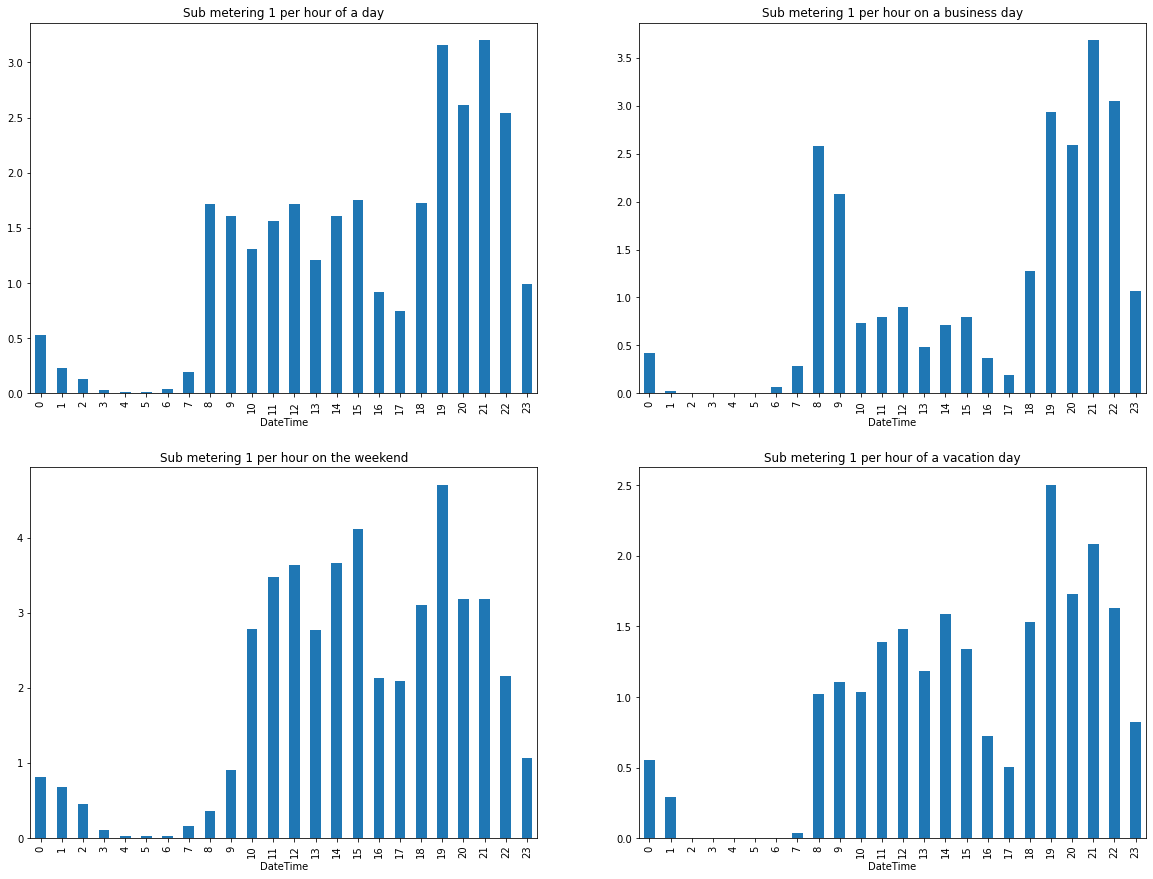

In [68]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

fig_sm1, axs = plt.subplots(2,2,figsize=(20, 15))

sub1_df = df[['Sub_metering_1']]
sub1_df = sub1_df.reset_index()

sub1_df_all = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
sub1_df_all.set_index('DateTime', inplace=True)
(sub1_df_all.groupby(sub1_df_all.index.hour)["Sub_metering_1"].mean()).plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title("Sub metering 1 per hour of a day")

sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
(sub1_df_bd.groupby(sub1_df_bd.index.hour)["Sub_metering_1"].mean()).plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title("Sub metering 1 per hour on a business day")

sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday.isin([5,6]))]
sub1_df_we.set_index('DateTime', inplace=True)
(sub1_df_we.groupby(sub1_df_we.index.hour)["Sub_metering_1"].mean()).plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title("Sub metering 1 per hour on the weekend")

sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
sub1_df_hd.set_index('DateTime', inplace=True)
(sub1_df_hd.groupby(sub1_df_hd.index.hour)["Sub_metering_1"].mean()).plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title("Sub metering 1 per hour of a vacation day")

fig_sm1.show()

#### Sub metering 2 per hour

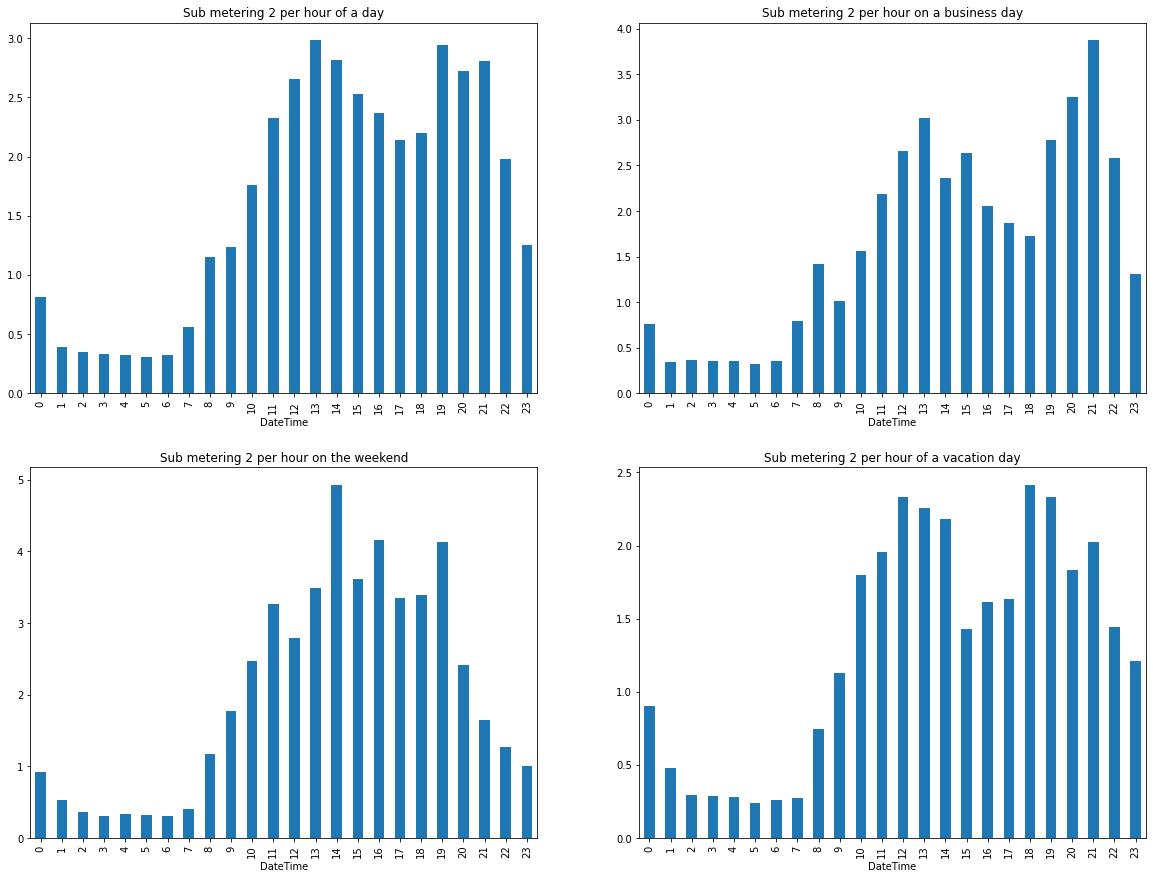

In [69]:
fig_sm2, axs = plt.subplots(2,2,figsize=(20, 15))

sub2_df = df[['Sub_metering_2']]
sub2_df = sub2_df.reset_index()

sub2_df_all = sub2_df.loc[sub2_df["DateTime"].dt.year == 2007]
sub2_df_all.set_index('DateTime', inplace=True)
(sub2_df_all.groupby(sub2_df_all.index.hour)["Sub_metering_2"].mean()).plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title("Sub metering 2 per hour of a day")

sub2_df_bd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.weekday != 5) & (sub2_df["DateTime"].dt.weekday != 6) & (sub2_df["DateTime"].dt.date.isin(holidays)==False)]
sub2_df_bd.set_index('DateTime', inplace=True)
(sub2_df_bd.groupby(sub2_df_bd.index.hour)["Sub_metering_2"].mean()).plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title("Sub metering 2 per hour on a business day")

sub2_df_we = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.weekday.isin([5,6]))]
sub2_df_we.set_index('DateTime', inplace=True)
(sub2_df_we.groupby(sub2_df_we.index.hour)["Sub_metering_2"].mean()).plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title("Sub metering 2 per hour on the weekend")

sub2_df_hd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.date.isin(holidays))]
sub2_df_hd.set_index('DateTime', inplace=True)
(sub2_df_hd.groupby(sub2_df_hd.index.hour)["Sub_metering_2"].mean()).plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title("Sub metering 2 per hour of a vacation day")

fig_sm2.show()

#### Sub metering 3 per hour

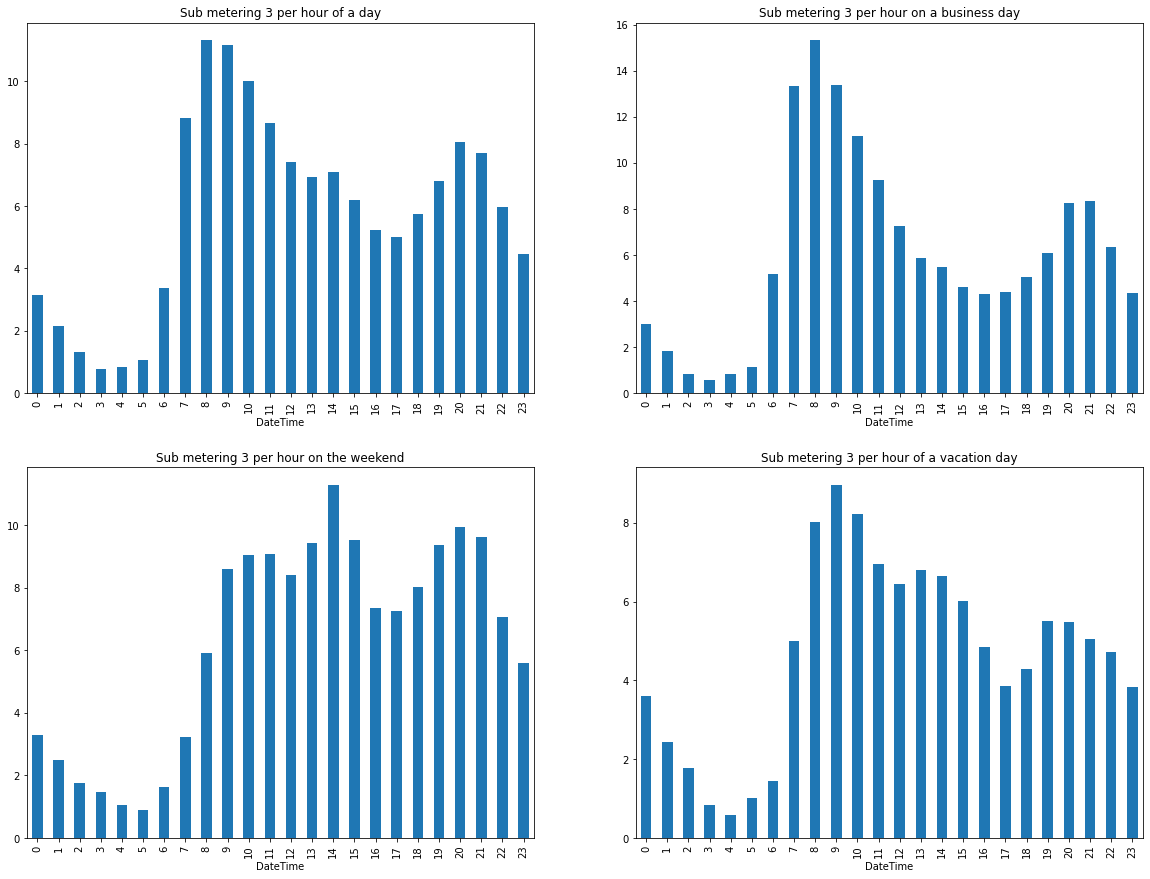

In [70]:
fig_sm3, axs = plt.subplots(2,2,figsize=(20, 15))

sub3_df = df[['Sub_metering_3']]
sub3_df = sub3_df.reset_index()

sub3_df_all = sub3_df.loc[sub3_df["DateTime"].dt.year == 2007]
sub3_df_all.set_index('DateTime', inplace=True)
(sub3_df_all.groupby(sub3_df_all.index.hour)["Sub_metering_3"].mean()).plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title("Sub metering 3 per hour of a day")

sub3_df_bd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.weekday != 5) & (sub3_df["DateTime"].dt.weekday != 6) & (sub3_df["DateTime"].dt.date.isin(holidays)==False)]
sub3_df_bd.set_index('DateTime', inplace=True)
(sub3_df_bd.groupby(sub3_df_bd.index.hour)["Sub_metering_3"].mean()).plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title("Sub metering 3 per hour on a business day")

sub3_df_we = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.weekday.isin([5,6]))]
sub3_df_we.set_index('DateTime', inplace=True)
(sub3_df_we.groupby(sub3_df_we.index.hour)["Sub_metering_3"].mean()).plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title("Sub metering 3 per hour on the weekend")

sub3_df_hd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.date.isin(holidays))]
sub3_df_hd.set_index('DateTime', inplace=True)
(sub3_df_hd.groupby(sub3_df_hd.index.hour)["Sub_metering_3"].mean()).plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title("Sub metering 3 per hour of a vacation day")

fig_sm3.show()

#### Sub metering 1 per minute

<AxesSubplot:xlabel='DateTime'>

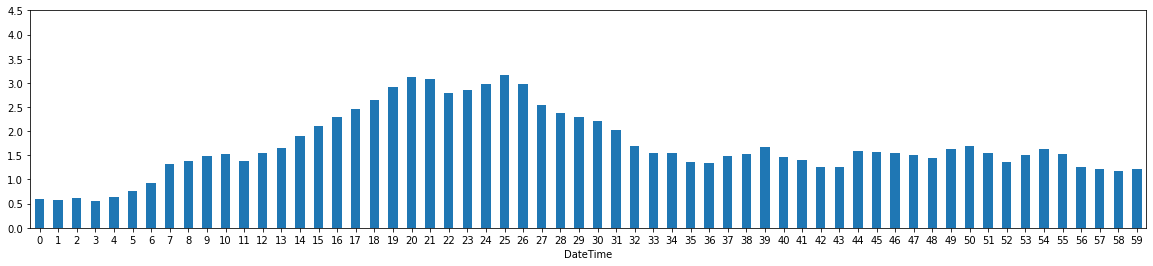

In [71]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_all.groupby([sub1_df_all.index.hour, sub1_df_all.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on business days

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on weekends

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_we.groupby([sub1_df_we.index.hour, sub1_df_we.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on holidays

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_hd.groupby([sub1_df_hd.index.hour, sub1_df_hd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

In [ ]:
import matplotlib
matplotlib.style.use('default')
group2 = sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean().unstack().transpose()
group2.plot(kind="bar", stacked=True,figsize=(20,20))


#### work in progress

In [ ]:
sub1_df_bd_march = sub1_df_bd.loc[(sub1_df["DateTime"].dt.month == 3)]
cumul

# fig, axs = plt.subplots(figsize=(20, 4))
# axs.set_ylim([0, 13])
# sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[7].plot(kind='bar', rot=0, ax=axs)

Interpretation of the plot :
Sharp increase of power consumption around 8am, implies that the famsilly wakes up around 8 on week days

#### Sub metering 1 per hour of the weekend days

### partie de theophile

In [ ]:
df_copy2 = df.copy().loc[df["DateTime"].dt.year == 2008]
df_copy2.index = pd.to_datetime(df_copy2['DateTime'])
df_copy2 = df_copy2.drop(['DateTime'], axis=1)
daily_avg = df_copy2.resample("D").mean()


In [ ]:
temp_2008 = pd.read_csv("pre_processing/temperatures_2008.csv", sep=',', parse_dates=["Date"])
temp_2008 = temp_2008.set_index(daily_avg.index)
temp_2008 = temp_2008.drop(['Date'], axis = 1)
temp_2008.head()

In [ ]:
print(daily_avg.shape)
print(temp_2008.shape)

In [ ]:
daily_avg['min_temp'] = temp_2008['min_t']
daily_avg['max_temp'] = temp_2008['max_t']
daily_avg.head(100)

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = daily_avg['Global_active_power']

m, b = np.polyfit(x, y, 1)
print('Global electic consumption = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']-daily_avg['Sub_metering_3']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices + sub3= {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

In [ ]:
def subplot_coord(x,y,param="all"):
    tuples =[]
    if param=="all":
        for i in range(x+1):
            for j in range(y+1):
                tuples.append((i,j))
    elif param=="line":
        for j in range(y+1):
                tuples.append((x,j))
    elif param=="line":
        for i in range(x+1):
                tuples.append((i,y))
    return tuples  

In [ ]:
fig, axis = plt.subplots(2,4,figsize=(20, 10))
fig.delaxes(axis[1,3])
indexes = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2)]
variables = list(df.columns)
variables.remove('DateTime')
data_bd = df.loc[(df["DateTime"].dt.weekday != 5) & (df["DateTime"].dt.weekday !=6) & (df["DateTime"].dt.date.isin(holidays)==False)]
data_we = df.loc[(df["DateTime"].dt.weekday == 5) | (df["DateTime"].dt.weekday ==6)]
data_hd = df.loc[(df["DateTime"].dt.date.isin(holidays))]


for idx, val in enumerate(indexes):
    temp_bd=data_bd[['DateTime',variables[idx]]]
    temp_we=data_we[['DateTime',variables[idx]]]
    temp_hd=data_hd[['DateTime',variables[idx]]]
    axis[val[0],val[1]].plot(temp_bd.groupby(temp_bd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].plot(temp_we.groupby(temp_we['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].plot(temp_hd.groupby(temp_hd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].set_title(variables[idx])
        
fig.tight_layout(pad=3.0)
fig.legend(['Business days', 'Weekends', 'Holidays'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
fig.show()

In [ ]:
fig, axis = plt.subplots(24,7,figsize=(25, 72))

hour = 0
variables = list(df.columns)
variables.remove('DateTime')
data_bd = df.loc[(df["DateTime"].dt.weekday != 5) & (df["DateTime"].dt.weekday !=6) & (df["DateTime"].dt.date.isin(holidays)==False)]
data_we = df.loc[(df["DateTime"].dt.weekday == 5) | (df["DateTime"].dt.weekday ==6)]
data_hd = df.loc[(df["DateTime"].dt.date.isin(holidays))]

for i in range(24):
    indexes = subplot_coord(i,6,"line")
    for idx, val in enumerate(indexes):
        temp_bd=data_bd[['DateTime',variables[idx]]].loc[(data_bd["DateTime"].dt.hour ==i)]
        temp_we=data_we[['DateTime',variables[idx]]].loc[(data_we["DateTime"].dt.hour ==i)]
        temp_hd=data_hd[['DateTime',variables[idx]]].loc[(data_hd["DateTime"].dt.hour ==i)]
        axis[val[0],val[1]].plot(temp_bd.groupby(temp_bd['DateTime'].dt.minute)[variables[idx]].mean())
        axis[val[0],val[1]].plot(temp_we.groupby(temp_we['DateTime'].dt.minute)[variables[idx]].mean())
        axis[val[0],val[1]].plot(temp_hd.groupby(temp_hd['DateTime'].dt.minute)[variables[idx]].mean())
        if val[0]==0:
            axis[val[0],val[1]].set_title(variables[idx], fontsize=10)
        if val[1]==0:
            axis[val[0],val[1]].set_title("{0}h-{1}h:".format(i,i+1), loc="left", fontsize=12)

fig.tight_layout(pad=3.0)
fig.legend(['Business days', 'Weekends', 'Holidays'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
fig.show()

## LSTM PREDICTION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.callbacks import TensorBoard

Preprocessing du df

In [ ]:
def data_to_supervised(df):
    data = pd.DataFrame(df)
    n_vars = data.shape[1]
    columns = []
    columns.append(data.shift(0))
    # temp = data.shift(0)
    columns.append(data.shift(-1)["Global_active_power"])
    df_labeled = pd.concat(columns, axis=1)
    names = ['gapow(t-1)', 'grpow(t-1)', 'volt(t-1)', 'int(t-1)', 'sub1(t-1)', 'sub2(t-1)', 'sub3(t-1)', 'gapow(t)']
    df_labeled.columns = names
    df_labeled.dropna(inplace=True)
    
    return df_labeled

In [ ]:
df_lstm = df.set_index('DateTime')
df_lstm = df_lstm.resample('h').mean()
df_lstm['Date'] = pd.to_datetime(df_lstm.index.date)
df_lstm.head(3)

In [ ]:
temperatures = pd.read_csv("pre_processing/temperatures.csv", parse_dates=['Date'], index_col='Date')
temperatures['avg_t'] = (temperatures['max_t'] - temperatures['min_t'])/2
temperatures.head(2)

In [ ]:
df_lstm = df_lstm.join(temperatures, how="left", on='Date')
df_lstm = df_lstm.drop(columns=['Date','max_t','min_t'])
df_lstm.head(3)

In [ ]:
df_lstm = df_lstm.copy()
df_lstm["Jour"] = df_lstm.index.dayofweek
df_lstm.head(3)

In [ ]:
scaler = MinMaxScaler()
df_lstm[df_lstm.columns] = scaler.fit_transform(df_lstm[df_lstm.columns])

In [ ]:
df_lstm.describe()

In [ ]:
df_lstm = data_to_supervised(df_lstm)

In [ ]:
df_lstm.head(3)

In [ ]:
values = df_lstm.values

trainsize = 0.5
n_rows = round(len(values)*trainsize)
print(f"Taille du trainset : {n_rows}")

train = values[:n_rows, :]
test = values[n_rows:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D format as expected by LSTMs [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
model = Sequential()
model.add(LSTM(125, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[1], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
df_lstm = df.set_index('DateTime')
df_lstm = df_lstm.resample('h').mean()
temperatures = pd.read_csv("pre_processing/temperatures.csv")
temperatures['Date'].apply(str)
temperatures.set_index('Date')
df_lstm['Date'] = df_lstm.index.date
df_lstm['Date'].apply(str)

#df_lstm = df_lstm.merge(temperatures, how='left', left_on='Date', right_on='Date')

#df_lstm.drop()
df_lstm.head()
dict_temp = temperatures.to_dict('index')
# dict_temp
#temperatures.head(1)
#print(df_lstm)